## Gráficos para un par de galaxias seleccionadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Curves2D
from astropy.cosmology import FlatLambdaCDM

In [2]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 9/' 
# path_win =

In [3]:
path_lin_fig = '/home/ramiro/Facultad/Tesis/Figuras/Actividad 9/'

In [4]:
plt.rcParams['text.usetex'] = True

In [5]:
cosmo = FlatLambdaCDM(H0=67.77, Om0=0.307)

In [6]:
a = 14696151 #Galaxia con level of merger alto.
b = 14875627 #Galaxia con level of merger bajo.

## Primera parte:
## Calculamos las medias en el bin en el que se encuentran las galaxias

In [7]:
DF = pd.read_csv(path_lin+'/RefL0100N1504_snap_28(Actividad_9).dat')

In [8]:
df = DF[(DF['Stars_Mass']>=1e10)].copy()

df['SF_logOH']=12+np.log10(df['SF_Oxygen']/df['SF_Hydrogen'])-np.log10(16)

In [9]:
ID = [ a, b]

In [10]:
mask_IDa = (df['GalaxyID'] == ID[0] )
mask_IDb = (df['GalaxyID'] == ID[1] )

Mass_a   = df['Stars_Mass'][mask_IDa]
Mass_b   = df['Stars_Mass'][mask_IDb]

MASS     = [Mass_a.iloc[0],Mass_b.iloc[0]]

print(Mass_a)
print(Mass_b)

11251    1.367417e+11
Name: Stars_Mass, dtype: float64
1697    1.170015e+11
Name: Stars_Mass, dtype: float64


In [11]:
mask_mass = (df['Stars_Mass'] >= (min(MASS)-min(MASS)*0.1))&(df['Stars_Mass']<= (max(MASS)+max(MASS)*0.1)) & (df['SF_logOH'].notna())

In [12]:
xvar = [np.log10(df['Stars_Mass'])[mask_mass].values]

yvar =  [
        np.log10(df['Stars_Mass'])[mask_mass].values,
        np.log10(df['BlackHoleMass'])[mask_mass].values,
        np.log10(df['Stars_Mass']+df['SF_Mass'])[mask_mass].values,
        np.log10(df['SF_Metallicity']/0.02)[mask_mass].values,
        df['SF_logOH'][mask_mass].values,
        (df['SF_Mass']/(df['Stars_Mass']+df['SF_Mass']))[mask_mass].values, 
        np.log10(df['StarFormationRate'])[mask_mass].values,
        np.log10(df['StarFormationRate']/df['Stars_Mass'])[mask_mass].values,
        df['R_halfmass30'][mask_mass].values,
        df['KappaCoRot'][mask_mass].values,
        np.log10((df['BlackHoleMass']/df['Stars_Mass']))[mask_mass].values
       ]

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
nbins=1        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

yvar_medians=[]
yvar_errors=[]

for j in np.arange(len(yvar)):
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar[0],yvar[j],bins=nbins,min_count=min_count,
                                                                 perc_low=perc_low,perc_high=perc_high)
    
    yvar_medians.append(ymedian)
    yvar_medians.append(ymedian)
    yvar_errors.append(yerror)
    yvar_errors.append(yerror)

    
yvar_medians.append(np.array([np.nan]))
yvar_medians.append(np.array([np.nan]))
yvar_errors.append(np.array([np.nan,np.nan]))
yvar_errors.append(np.array([np.nan,np.nan]))

In [14]:
yvar_medians

[array([11.10636995]),
 array([11.10636995]),
 array([8.22258519]),
 array([8.22258519]),
 array([11.12012286]),
 array([11.12012286]),
 array([0.17910667]),
 array([0.17910667]),
 array([9.081565]),
 array([9.081565]),
 array([0.02380468]),
 array([0.02380468]),
 array([0.17983502]),
 array([0.17983502]),
 array([-10.95811322]),
 array([-10.95811322]),
 array([6.39362793]),
 array([6.39362793]),
 array([0.25589788]),
 array([0.25589788]),
 array([-2.86543929]),
 array([-2.86543929]),
 array([nan]),
 array([nan])]

In [15]:
yvar_errors

[array([[0.03821332],
        [0.02932023]]),
 array([[0.03821332],
        [0.02932023]]),
 array([[0.1704904 ],
        [0.17653828]]),
 array([[0.1704904 ],
        [0.17653828]]),
 array([[0.03830283],
        [0.03231037]]),
 array([[0.03830283],
        [0.03231037]]),
 array([[0.12166716],
        [0.13166699]]),
 array([[0.12166716],
        [0.13166699]]),
 array([[0.12465162],
        [0.12380937]]),
 array([[0.12465162],
        [0.12380937]]),
 array([[0.01537162],
        [0.03000412]]),
 array([[0.01537162],
        [0.03000412]]),
 array([[0.50221977],
        [0.35137097]]),
 array([[0.50221977],
        [0.35137097]]),
 array([[0.47516425],
        [0.37874983]]),
 array([[0.47516425],
        [0.37874983]]),
 array([[1.09797095],
        [0.93549789]]),
 array([[1.09797095],
        [0.93549789]]),
 array([[0.07918317],
        [0.15183924]]),
 array([[0.07918317],
        [0.15183924]]),
 array([[0.16126141],
        [0.17301649]]),
 array([[0.16126141],
        [0.1

## Segunda parte:
## Graficamos diferentes magnitudes en función del tiempo

In [16]:
# Tablas para la galaxia a
Siz_tree_a = pd.read_csv(path_lin+'/Actividad_9_Tree(Sizes_'+str(a)+').dat')
Sub_tree_a = pd.read_csv(path_lin+'/Actividad_9_Tree(Subhalo_'+str(a)+').dat')
Mor_tree_a = pd.read_csv(path_lin+'/Actividad_9_Tree(MorphoKinem_'+str(a)+').dat')

# Tablas para la galaxia b
Siz_tree_b = pd.read_csv(path_lin+'/Actividad_9_Tree(Sizes_'+str(b)+').dat')
Sub_tree_b = pd.read_csv(path_lin+'/Actividad_9_Tree(Subhalo_'+str(b)+').dat')
Mor_tree_b = pd.read_csv(path_lin+'/Actividad_9_Tree(MorphoKinem_'+str(b)+').dat')

# Historia de merger de las galaxias mayores a 10**10 del snap 28
merger = pd.read_csv('/home/ramiro/Facultad/Tesis/Datos/Actividad 7/Actividad_8(merger_history).dat')

In [17]:
# Seleccionamos la histora particular de las fusiones para las galaxias seleccionadas 
mask_a = (merger['GalaxyID_test'] == a)
merger_a = merger[mask_a].drop(labels=['GalaxyID_test','GroupID_test'],axis=1).copy()

mask_b = (merger['GalaxyID_test'] == b)
merger_b = merger[mask_b].drop(labels=['GalaxyID_test','GroupID_test'],axis=1).copy()

# RedShift correspondiente a los sanps 1 a 28
redshift = [15.13, 9.99, 8.99, 8.07, 7.05, 5.97, 5.49, 5.04, 4.49, 3.98,
             3.53, 3.02, 2.48, 2.24, 2.01, 1.74, 1.49, 1.26, 1.00, 0.87,
             0.74, 0.62, 0.50, 0.37, 0.27, 0.18, 0.10, 0.00]

REDSHIFT = ['15.13', '9.99', '8.99', '8.07', '7.05', '5.97', '5.49', '5.04', '4.49', '3.98',
             '3.53', '3.02', '2.48', '2.24', '2.01', '1.74', '1.49', '1.26', '1.00', '0.87',
             '0.74', '0.62', '0.50', '0.37', '0.27', '0.18', '0.10', '0.00']

tiempo = cosmo.age(redshift).value

In [18]:
# Tiramos las columnas que estén repetidas
Sub_tree_a.drop(labels=['SubHaloGalaxyID'],axis=1,inplace=True)
Sub_tree_b.drop(labels=['SubHaloGalaxyID'],axis=1,inplace=True)

In [19]:
# Agregamos una columna temporal
Sub_tree_a['tiempo'] = cosmo.age(Sub_tree_a['Redshift']).value
Sub_tree_b['tiempo'] = cosmo.age(Sub_tree_b['Redshift']).value

In [20]:
# Unimos las diferentes tablas de los catálogos que tengamos

# Para la galaxia a
Sub_Mor_tree_a = pd.merge(right=Mor_tree_a,left=Sub_tree_a,right_on='GalaxyID',left_on='GalaxyID')
Sub_Siz_tree_a = pd.merge(right=Siz_tree_a,left=Sub_tree_a,right_on='GalaxyID',left_on='GalaxyID')

# Para la galaxia b
Sub_Mor_tree_b = pd.merge(right=Mor_tree_b,left=Sub_tree_b,right_on='GalaxyID',left_on='GalaxyID')
Sub_Siz_tree_b = pd.merge(right=Siz_tree_b,left=Sub_tree_b,right_on='GalaxyID',left_on='GalaxyID')

In [21]:
# Ordenamos de manera decreciente según el redshift

# Para la galaxia a
Sub_tree_a.sort_values(by=['Redshift'],ascending=False,inplace=True)
Sub_Mor_tree_a.sort_values(by=['Redshift'],ascending=False,inplace=True)
Sub_Siz_tree_a.sort_values(by=['Redshift'],ascending=False,inplace=True)

# Para la galaxia b
Sub_tree_b.sort_values(by=['Redshift'],ascending=False,inplace=True)
Sub_Mor_tree_b.sort_values(by=['Redshift'],ascending=False,inplace=True)
Sub_Siz_tree_b.sort_values(by=['Redshift'],ascending=False,inplace=True)

In [22]:
# Creamos la Main Branch de cada una de las galaxias, para eso armamos un dict con myIDs

myIDs_a = {'GalaxyID': Sub_tree_a['GalaxyID'].iloc[-1],'TopLeafID': Sub_tree_a['TopLeafID'].iloc[-1],
           'LastProgID': Sub_tree_a['LastProgID'].iloc[-1],'DescendantID': Sub_tree_a['DescendantID'].iloc[-1]} 

myIDs_b = {'GalaxyID': Sub_tree_b['GalaxyID'].iloc[-1],'TopLeafID': Sub_tree_b['TopLeafID'].iloc[-1],
           'LastProgID': Sub_tree_b['LastProgID'].iloc[-1],'DescendantID': Sub_tree_b['DescendantID'].iloc[-1]}


# Armo un diccionario con solo la main branch del árbol

Main_Sub_a     = {}
Main_Sub_Mor_a = {}
Main_Sub_Siz_a = {}

Main_Sub_b     = {}
Main_Sub_Mor_b = {}
Main_Sub_Siz_b = {}

# Mascaras para las galaxias y los diferentes catálogos

# Para la galxia a
mask_main_sub_a     = np.logical_and(Sub_tree_a['GalaxyID']>=myIDs_a['GalaxyID'],
                                     Sub_tree_a['GalaxyID']<=myIDs_a['TopLeafID'])

mask_main_sub_mor_a = np.logical_and(Sub_Mor_tree_a['GalaxyID']>=myIDs_a['GalaxyID'],
                                     Sub_Mor_tree_a['GalaxyID']<=myIDs_a['TopLeafID'])

mask_main_sub_siz_a = np.logical_and(Sub_Siz_tree_a['GalaxyID']>=myIDs_a['GalaxyID'],
                                     Sub_Siz_tree_a['GalaxyID']<=myIDs_a['TopLeafID'])

# Para la galaxia b

mask_main_sub_b     = np.logical_and(Sub_tree_b['GalaxyID']>=myIDs_b['GalaxyID'],
                                     Sub_tree_b['GalaxyID']<=myIDs_b['TopLeafID'])

mask_main_sub_mor_b = np.logical_and(Sub_Mor_tree_b['GalaxyID']>=myIDs_b['GalaxyID'],
                                     Sub_Mor_tree_b['GalaxyID']<=myIDs_b['TopLeafID'])

mask_main_sub_siz_b = np.logical_and(Sub_Siz_tree_b['GalaxyID']>=myIDs_b['GalaxyID'],
                                     Sub_Siz_tree_b['GalaxyID']<=myIDs_b['TopLeafID'])

# Creamos la main brunch

# Para la galaxia a
for key in Sub_tree_a.keys():
    Main_Sub_a[key] = Sub_tree_a[key][mask_main_sub_a]
    
for key in Sub_Mor_tree_a.keys():
    Main_Sub_Mor_a[key] = Sub_Mor_tree_a[key][mask_main_sub_mor_a]
    
for key in Sub_Siz_tree_a.keys():
    Main_Sub_Siz_a[key] = Sub_Siz_tree_a[key][mask_main_sub_siz_a]

# Para la galaxia b
for key in Sub_tree_b.keys():
    Main_Sub_b[key] = Sub_tree_b[key][mask_main_sub_b]
    
for key in Sub_Mor_tree_b.keys():
    Main_Sub_Mor_b[key] = Sub_Mor_tree_b[key][mask_main_sub_mor_b]
    
for key in Sub_Siz_tree_b.keys():
    Main_Sub_Siz_b[key] = Sub_Siz_tree_b[key][mask_main_sub_siz_b]


In [23]:
# Dataframe de los catálogos para las galaxias elegidas, main brunch.
Main_Sub_a     = pd.DataFrame(Main_Sub_a)
Main_Sub_Mor_a = pd.DataFrame(Main_Sub_Mor_a)
Main_Sub_Siz_a = pd.DataFrame(Main_Sub_Siz_a)

Main_Sub_b     = pd.DataFrame(Main_Sub_b)
Main_Sub_Mor_b = pd.DataFrame(Main_Sub_Mor_b)
Main_Sub_Siz_b = pd.DataFrame(Main_Sub_Siz_b)

In [24]:
# Listas de los catálogos para las galaxias elegidas, trees.

SUB_TREE     = [Sub_tree_a, Sub_tree_b]
SUB_SIZ_TREE = [Sub_Siz_tree_a, Sub_Siz_tree_b]
SUB_MOR_TREE = [Sub_Mor_tree_a, Sub_Mor_tree_b]

In [25]:
# Listas de los catálogos para las galaxias elegidas, trees.

SUB_MAIN     = [Main_Sub_a, Main_Sub_b]
SUB_SIZ_MAIN = [Main_Sub_Siz_a, Main_Sub_Siz_b]
SUB_MOR_MAIN = [Main_Sub_Mor_a, Main_Sub_Mor_b]

In [26]:
# Variables que vamos a graficar, tanto para la galaxia a como para la b

xvar_tree = [
             SUB_TREE[0]['tiempo'], SUB_TREE[1]['tiempo']
            ,SUB_TREE[0]['tiempo'], SUB_TREE[1]['tiempo']
            ,SUB_TREE[0]['tiempo'], SUB_TREE[1]['tiempo']
            ,SUB_TREE[0]['tiempo'], SUB_TREE[1]['tiempo']
            ,SUB_TREE[0]['tiempo'], SUB_TREE[1]['tiempo']
            ,SUB_TREE[0]['tiempo'], SUB_TREE[1]['tiempo']
            ,SUB_TREE[0]['tiempo'], SUB_TREE[1]['tiempo']
            ,SUB_TREE[0]['tiempo'], SUB_TREE[1]['tiempo']
            ,SUB_SIZ_TREE[0]['tiempo'], SUB_SIZ_TREE[1]['tiempo']
            ,SUB_MOR_TREE[0]['tiempo'], SUB_MOR_TREE[1]['tiempo']
            ,SUB_TREE[0]['tiempo'], SUB_TREE[1]['tiempo']
            ,pd.Series(tiempo), pd.Series(tiempo)
            ]

xvar_tree_sup = [
             SUB_TREE[0]['Redshift'], SUB_TREE[1]['Redshift']
            ,SUB_TREE[0]['Redshift'], SUB_TREE[1]['Redshift']
            ,SUB_TREE[0]['Redshift'], SUB_TREE[1]['Redshift']
            ,SUB_TREE[0]['Redshift'], SUB_TREE[1]['Redshift']
            ,SUB_TREE[0]['Redshift'], SUB_TREE[1]['Redshift']
            ,SUB_TREE[0]['Redshift'], SUB_TREE[1]['Redshift']
            ,SUB_TREE[0]['Redshift'], SUB_TREE[1]['Redshift']
            ,SUB_TREE[0]['Redshift'], SUB_TREE[1]['Redshift']
            ,SUB_SIZ_TREE[0]['Redshift'], SUB_SIZ_TREE[1]['Redshift']
            ,SUB_MOR_TREE[0]['Redshift'], SUB_MOR_TREE[1]['Redshift']
            ,SUB_TREE[0]['Redshift'], SUB_TREE[1]['Redshift']
            ,pd.Series(redshift), pd.Series(redshift)
            ]


yvar_tree = [
             np.log10(SUB_TREE[0]['Stars_Mass']), np.log10(SUB_TREE[1]['Stars_Mass'])
            ,np.log10(SUB_TREE[0]['BlackHoleMass']),np.log10(SUB_TREE[1]['BlackHoleMass'])
            ,np.log10(SUB_TREE[0]['Stars_Mass']+SUB_TREE[0]['SF_Mass']), np.log10(SUB_TREE[1]['Stars_Mass']+SUB_TREE[1]['SF_Mass'])
            ,np.log10(SUB_TREE[0]['SF_Metallicity']/0.02),np.log10(SUB_TREE[1]['SF_Metallicity']/0.02)
            ,SUB_TREE[0]['SF_logOH'], SUB_TREE[1]['SF_logOH']
            ,SUB_TREE[0]['SF_Mass']/(SUB_TREE[0]['Stars_Mass']+SUB_TREE[0]['SF_Mass']), SUB_TREE[1]['SF_Mass']/(SUB_TREE[1]['Stars_Mass']+SUB_TREE[1]['SF_Mass']) 
            ,np.log10(SUB_TREE[0]['StarFormationRate']), np.log10(SUB_TREE[1]['StarFormationRate'])
            ,np.log10(SUB_TREE[0]['StarFormationRate']/SUB_TREE[0]['Stars_Mass']), np.log10(SUB_TREE[1]['StarFormationRate']/SUB_TREE[1]['Stars_Mass'])
            ,SUB_SIZ_TREE[0]['R_halfmass30'], SUB_SIZ_TREE[1]['R_halfmass30']
            ,SUB_MOR_TREE[0]['KappaCoRot'], SUB_MOR_TREE[1]['KappaCoRot']
            ,np.log10(SUB_TREE[0]['BlackHoleMass']/SUB_TREE[0]['Stars_Mass']),np.log10(SUB_TREE[1]['BlackHoleMass']/SUB_TREE[1]['Stars_Mass'])
            ,merger_a.T, merger_b.T
           ]

xvar_main = [
             SUB_MAIN[0]['tiempo'], SUB_MAIN[1]['tiempo']
            ,SUB_MAIN[0]['tiempo'], SUB_MAIN[1]['tiempo']
            ,SUB_MAIN[0]['tiempo'], SUB_MAIN[1]['tiempo']
            ,SUB_MAIN[0]['tiempo'], SUB_MAIN[1]['tiempo']
            ,SUB_MAIN[0]['tiempo'], SUB_MAIN[1]['tiempo']
            ,SUB_MAIN[0]['tiempo'], SUB_MAIN[1]['tiempo']
            ,SUB_MAIN[0]['tiempo'], SUB_MAIN[1]['tiempo']
            ,SUB_MAIN[0]['tiempo'], SUB_MAIN[1]['tiempo']
            ,SUB_SIZ_MAIN[0]['tiempo'], SUB_SIZ_MAIN[1]['tiempo']
            ,SUB_MOR_MAIN[0]['tiempo'], SUB_MOR_MAIN[1]['tiempo']
            ,SUB_MAIN[0]['tiempo'], SUB_MAIN[1]['tiempo']
            ,pd.Series(tiempo), pd.Series(tiempo)
            ] 

xvar_main_sup = [
             SUB_MAIN[0]['Redshift'], SUB_MAIN[1]['Redshift']
            ,SUB_MAIN[0]['Redshift'], SUB_MAIN[1]['Redshift']
            ,SUB_MAIN[0]['Redshift'], SUB_MAIN[1]['Redshift']
            ,SUB_MAIN[0]['Redshift'], SUB_MAIN[1]['Redshift']
            ,SUB_MAIN[0]['Redshift'], SUB_MAIN[1]['Redshift']
            ,SUB_MAIN[0]['Redshift'], SUB_MAIN[1]['Redshift']
            ,SUB_MAIN[0]['Redshift'], SUB_MAIN[1]['Redshift']
            ,SUB_MAIN[0]['Redshift'], SUB_MAIN[1]['Redshift']
            ,SUB_SIZ_MAIN[0]['Redshift'], SUB_SIZ_MAIN[1]['Redshift']
            ,SUB_MOR_MAIN[0]['Redshift'], SUB_MOR_MAIN[1]['Redshift']
            ,SUB_MAIN[0]['Redshift'], SUB_MAIN[1]['Redshift']
            ,pd.Series(redshift), pd.Series(redshift)
            ]


yvar_main = [
             np.log10(SUB_MAIN[0]['Stars_Mass']), np.log10(SUB_MAIN[1]['Stars_Mass'])
            ,np.log10(SUB_MAIN[0]['BlackHoleMass']),np.log10(SUB_MAIN[1]['BlackHoleMass'])
            ,np.log10(SUB_MAIN[0]['Stars_Mass']+SUB_MAIN[0]['SF_Mass']), np.log10(SUB_MAIN[1]['Stars_Mass']+SUB_MAIN[1]['SF_Mass'])
            ,np.log10(SUB_MAIN[0]['SF_Metallicity']/0.02),np.log10(SUB_MAIN[1]['SF_Metallicity']/0.02)
            ,SUB_MAIN[0]['SF_logOH'], SUB_MAIN[1]['SF_logOH']
            ,SUB_MAIN[0]['SF_Mass']/(SUB_MAIN[0]['Stars_Mass']+SUB_MAIN[0]['SF_Mass']), SUB_MAIN[1]['SF_Mass']/(SUB_MAIN[1]['Stars_Mass']+SUB_MAIN[1]['SF_Mass']) 
            ,np.log10(SUB_MAIN[0]['StarFormationRate']), np.log10(SUB_MAIN[1]['StarFormationRate'])
            ,np.log10(SUB_MAIN[0]['StarFormationRate']/SUB_MAIN[0]['Stars_Mass']), np.log10(SUB_MAIN[1]['StarFormationRate']/SUB_MAIN[1]['Stars_Mass'])
            ,SUB_SIZ_MAIN[0]['R_halfmass30'], SUB_SIZ_MAIN[1]['R_halfmass30']
            ,SUB_MOR_MAIN[0]['KappaCoRot'], SUB_MOR_MAIN[1]['KappaCoRot']
            ,np.log10(SUB_MAIN[0]['BlackHoleMass']/SUB_MAIN[0]['Stars_Mass']),np.log10(SUB_MAIN[1]['BlackHoleMass']/SUB_MAIN[1]['Stars_Mass'])
            ,merger_a.T, merger_b.T
            ]

# Labels para todas las variables

xlabels = [ 
            r'$Tiempo[Gyr]$'
          ]

xlabels_sup = [
                r'$Redshift$'
              ]


ylabels = [
            r'$Log(M_{Star})[M_{Sun}]$', r'$Log(M_{Star})[M_{Sun}]$'
           ,r'$Log(BlackHoleMass)$',r'$Log(BlackHoleMass)$'
           ,r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$', r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
           ,r'$Log(Z_{Star}/Z_{Sun})$', r'$Log(Z_{Star}/Z_{Sun})$'
           ,r'$12+Log(O/H)$',r'$12+Log(O/H)$'
           ,r'$MSF_{gas}/(MSF_{gas}+M_{Star})$', r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
           ,r'$Log(SFR)[unidad]$', r'$Log(SFR)[unidad]$'
           ,r'$Log(sSFR)[unidad]$', r'$Log(sSFR)[unidad]$'
           ,r'$R_{HM30}[pkpc]$', r'$R_{HM30}[pkpc]$'
           ,r'$KappaCoRot$', r'$KappaCoRot$'
           ,r'$Log(BlackHoleMass/M_{Star})$', r'$Log(BlackHoleMass/M_{Star})$'
           ,r'$L_{Merger}$',r'$L_{Merger}$'
          ]

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/ramiro/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ramiro/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


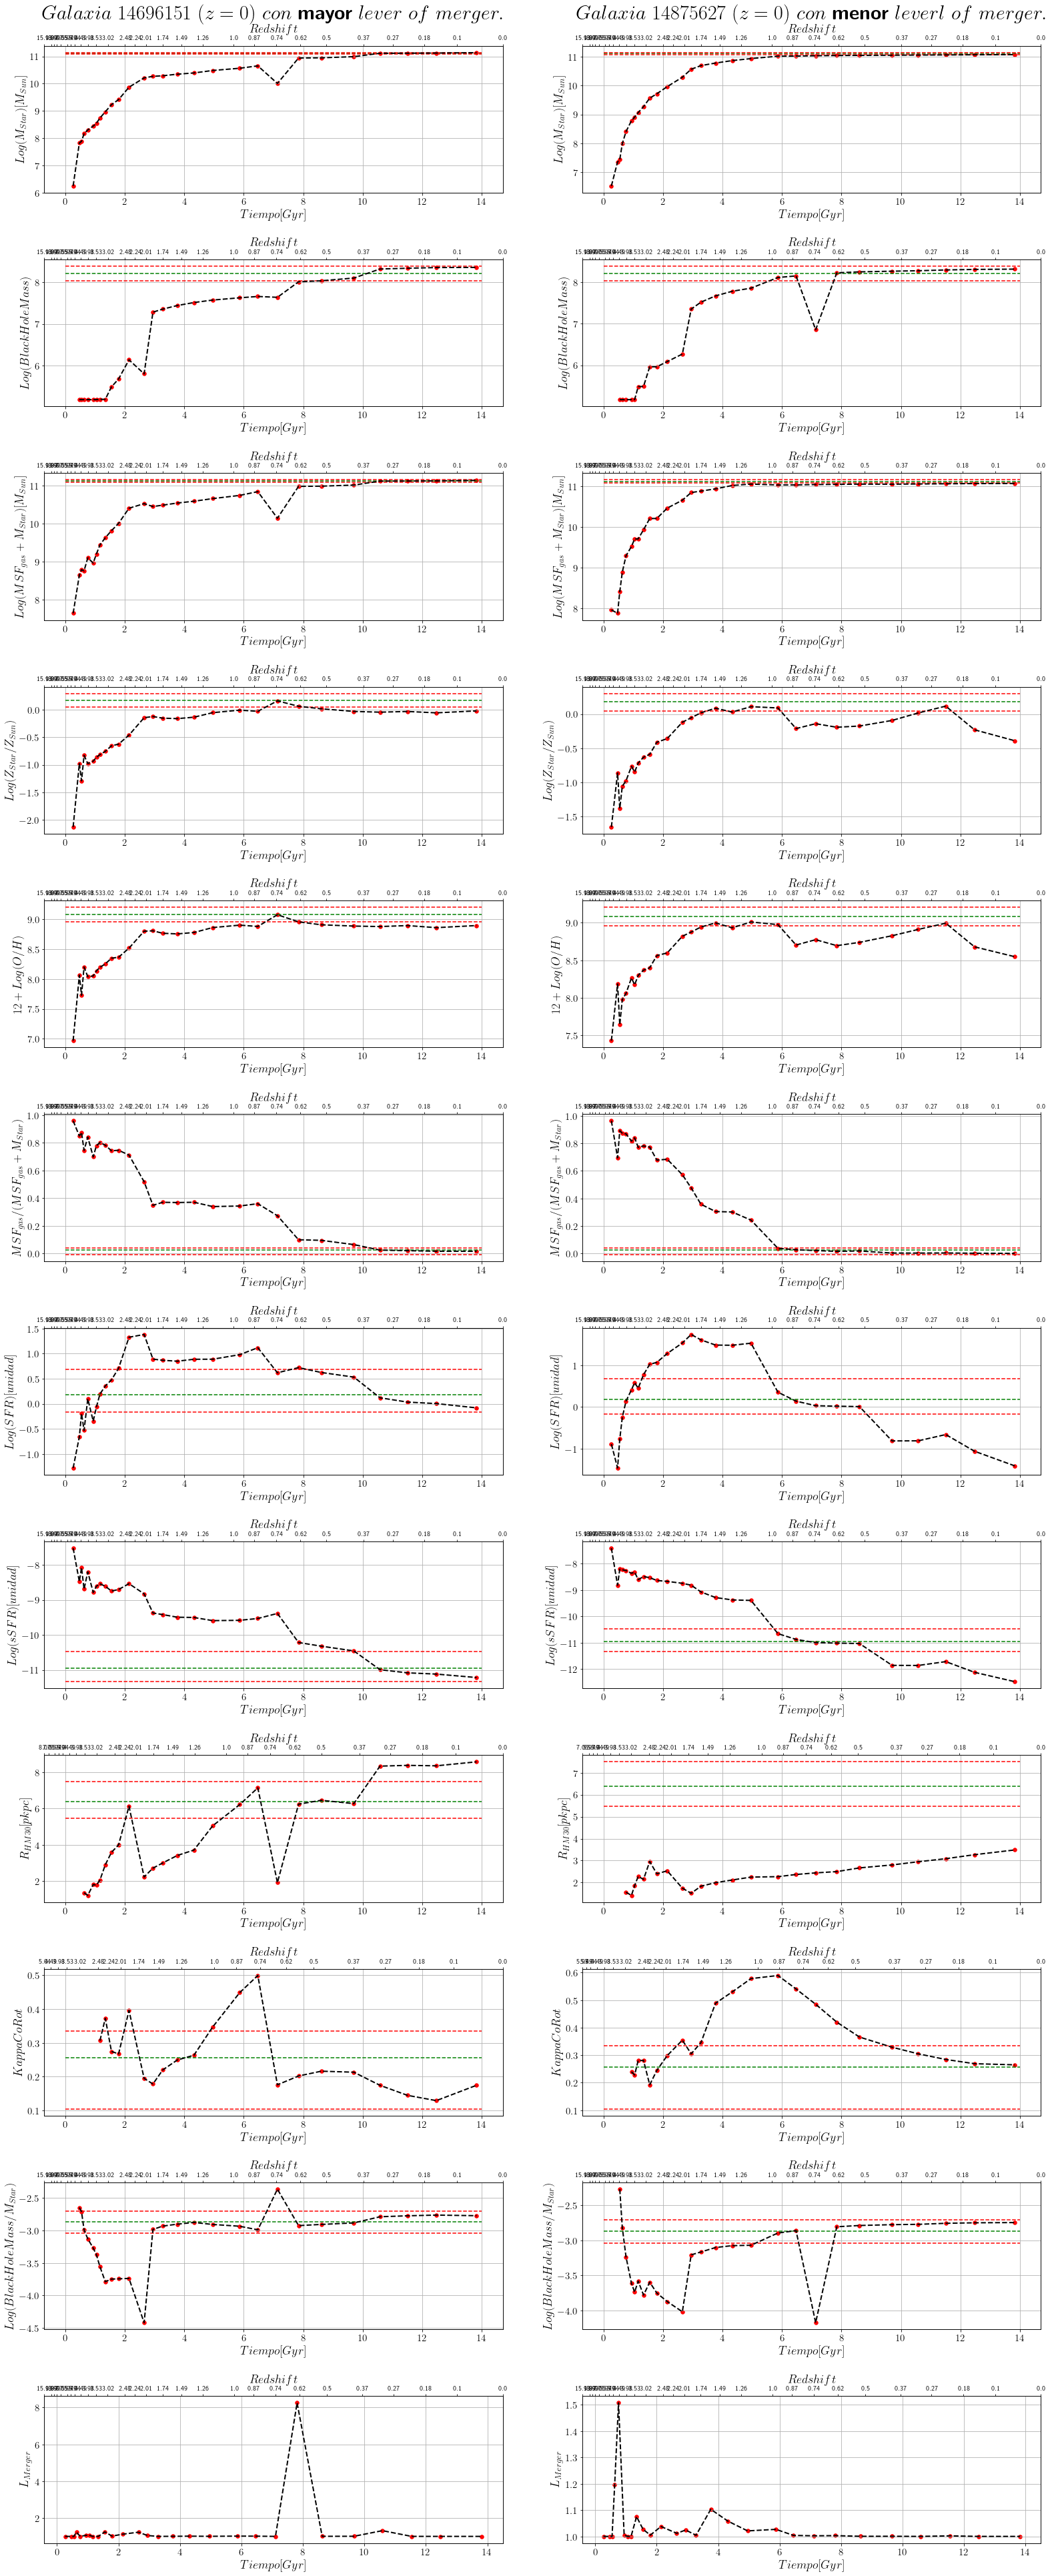

In [31]:
# Gráfico

fig,ax = plt.subplots(int(len(ylabels)/2),2,figsize=(25,65))
ax = ax.flatten() # Convertimos a ax en una array plano para recorrerlo tranqui con un for 

fig.tight_layout(pad=10.0)

fontdict ={'fontsize': 30}

for i in np.arange(len(ylabels)):

#     xlim=(min(xvar[i]),max(xvar[i]))
#     ylim=(min(yvar[i]),max(yvar[i]))

    ax[i].set_xlabel(str(xlabels[0]),fontsize=18)
    ax[i].set_ylabel(str(ylabels[i]),fontsize=18)

#     ax[i].set_xlim(xlim)
#     ax[i].set_ylim(ylim)

    ax[i].tick_params(axis='both', which='major', labelsize=15)
                
    plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

    # scatter plot
#     ax[i].scatter(xvar_tree[i],yvar_tree[i],marker='o',s=2,c='0.3',label='Scatter plot')  #Para el tree
    
    ax[i].scatter(xvar_main[i],yvar_main[i],marker='o',s=30,c='r',linestyle='-',label='Scatter plot') # Para la rama principal
    ax[i].plot(xvar_main[i],yvar_main[i],linestyle='--',c='k',lw=2)
    
    ax[i].hlines(yvar_medians[i], 0, 14,colors = 'g',linestyles='dashed')
    ax[i].hlines(yvar_medians[i] + yvar_errors[i][0], 0, 14,colors = 'r',linestyles='dashed')
    ax[i].hlines(yvar_medians[i] - yvar_errors[i][1], 0, 14,colors = 'r',linestyles='dashed')


    
#     Label superior
    new_redshift=[]
    for j in np.arange(len(xvar_main_sup[i].values)):
        new_redshift.append(str(np.round(xvar_main_sup[i].values,2)[j]))
    
    
    ax2 = ax[i].twiny()
    ax2.set_xlim(min(xvar_main[i].values),max(xvar_main[i].values))
    ax2.set_xticks(xvar_main[i].values)
    ax2.set_xticklabels(new_redshift)
    ax2.set_xlabel(xlabels_sup[0],fontdict={'fontsize': 18})
    
    ax[i].grid()

ax[0].set_title(r'$Galaxia\ '+str(a)+'\ (z=0)\ con\ \\textbf{mayor}\ lever\ of\ merger.$',fontdict=fontdict)
ax[1].set_title(r'$Galaxia\ '+str(b)+'\ (z=0)\ con\ \\textbf{menor}\ leverl\ of\ merger.$',fontdict=fontdict)


# plt.savefig(path_lin_fig+'figura_version1.png')

plt.show()

In [31]:
# Fin

In [78]:
xvar_main[5].values

array([ 0.26789515,  0.47615619,  0.54976254,  0.63472829,  0.75958636,
        0.94212762,  1.04916664,  1.1682925 ,  1.34825862,  1.55565856,
        1.79451822,  2.14430335,  2.65258178,  2.94865167,  3.27622412,
        3.76685405,  4.32529471,  4.95827657,  5.86378736,  6.47196754,
        7.13077754,  7.84109623,  8.6030631 ,  9.69806991, 10.57650691,
       11.50123641, 12.46912691, 13.8205298 ])

In [81]:
new_redshift

['15.13',
 '9.99',
 '8.99',
 '8.07',
 '7.05',
 '5.97',
 '5.49',
 '5.04',
 '4.49',
 '3.98',
 '3.53',
 '3.02',
 '2.48',
 '2.24',
 '2.01',
 '1.74',
 '1.49',
 '1.26',
 '1.0',
 '0.87',
 '0.74',
 '0.62',
 '0.5',
 '0.37',
 '0.27',
 '0.18',
 '0.1',
 '0.0']

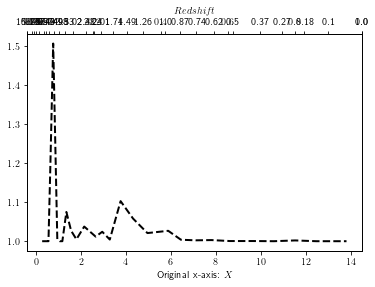

In [85]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(xvar_main[i],yvar_main[i],linestyle='--',c='k',lw=2)
ax1.set_xlabel(r"Original x-axis: $X$")


ax2 = ax1.twiny()
ax2.set_xlim(min(xvar_main[5].values),max(xvar_main[5].values))
ax2.set_xticks(xvar_main[5].values)
ax2.set_xticklabels(new_redshift,minor=False)
ax2.set_xlabel(xlabels_sup[0])
plt.show()

In [31]:
df['SF_logOH'][df['SF_logOH'].notna()]

24       9.520752
28       9.280595
29       9.026237
32       9.128866
35       9.202107
           ...   
13287    9.227482
13290    9.202013
13291    9.509145
13292    8.915082
13293    9.503369
Name: SF_logOH, Length: 3093, dtype: float64